#  Big Mart Sells Prediction - Analytics Vidya

* Sales of a given product at a retail store can depend both on store attributes as well as product attributes. Build a data science solution to predict the same for 'Big Mart'!

### Contest Link - https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

train = pd.read_csv("train_XnW6LSF.csv")
test = pd.read_csv("test_FewQE9B.csv")
ss = pd.read_csv("sample_submission_Test.csv")

train.shape , test.shape , ss.shape

((8523, 12), (5681, 11), (5681, 3))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pd.set_option('display.max_columns', 50)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Exploration, EDA

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Univariate Analysis by Sweetviz

In [9]:
# import sweetviz as sv
# eda = sv.analyze(train)
# eda.show_html('edal.html')

* Item_Identifier - So many unique values see if something can be extracted
* Item_Weight - Numeric , Missing value needs to be treated
* Item_Fat_Content - Convert to boolean
* Item_Visibility - Numeric # Treat the zeroes
* Item_Type - Categoricals
* Item_MRP - Numeric
* Outlet_Identifier - Categoricals
* Outlet_Establishment_Year - Can be dropped
* Outlet_Size - Can be Convert to Numeric ( 1,2,3) , fill missing values
* Outlet_Location_Type - Can be Convert to Numeric ( 1,2,3)
* Outlet_Type - Convert to Numeric ( 0, 1,2,3)

In [10]:
for col in train.iloc[:,0:21].columns:
    print(col,':',train[col].nunique(),':',train[col].isna().sum())
    #target_mean(train.col,'click_rate_log')

Item_Identifier : 1559 : 0
Item_Weight : 415 : 1463
Item_Fat_Content : 5 : 0
Item_Visibility : 7880 : 0
Item_Type : 16 : 0
Item_MRP : 5938 : 0
Outlet_Identifier : 10 : 0
Outlet_Establishment_Year : 9 : 0
Outlet_Size : 3 : 2410
Outlet_Location_Type : 3 : 0
Outlet_Type : 4 : 0
Item_Outlet_Sales : 3493 : 0


### Target Analysis

In [11]:
pip install seaborn

In [12]:
import seaborn
import matplotlib.pyplot as plt

AttributeError: PolyCollection.set() got an unexpected keyword argument 'style'

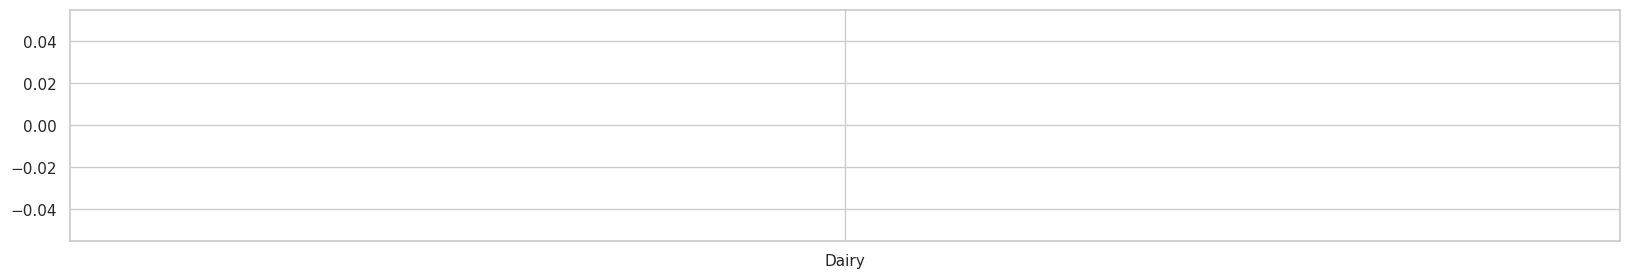

In [30]:

fig, ax = plt.subplots(figsize=(20, 3))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Item_Type", y ="Item_Outlet_Sales",style ="event",data = train)


AttributeError: PolyCollection.set() got an unexpected keyword argument 'style'

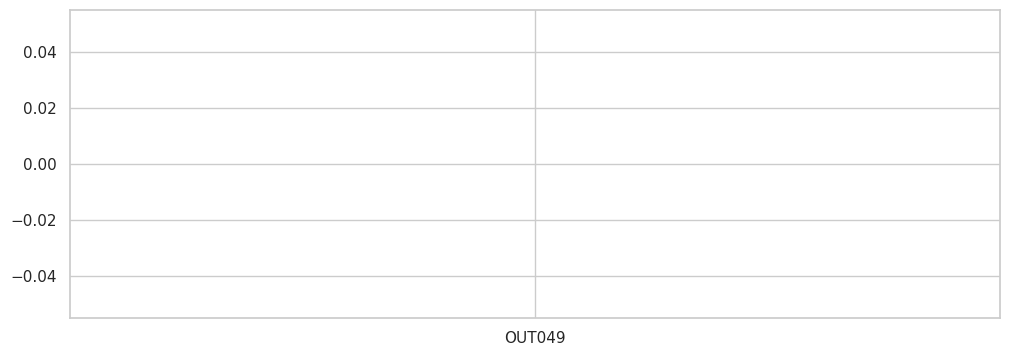

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Identifier", y ="Item_Outlet_Sales",style ="event",data = train)

AttributeError: PolyCollection.set() got an unexpected keyword argument 'style'

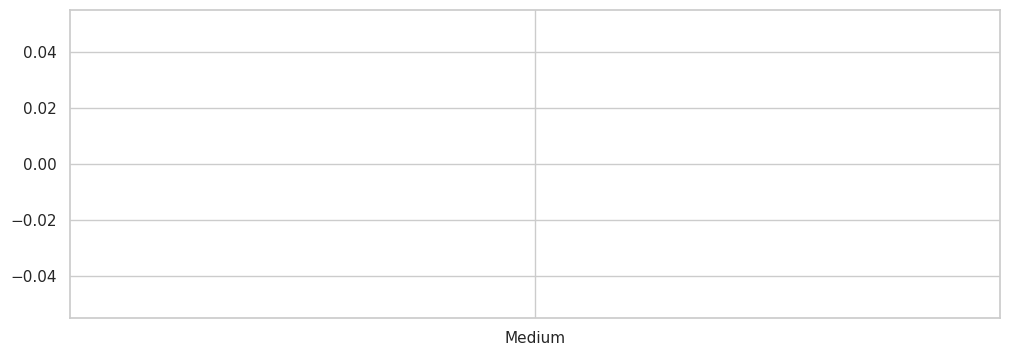

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Size", y ="Item_Outlet_Sales",style ="event",data = train)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

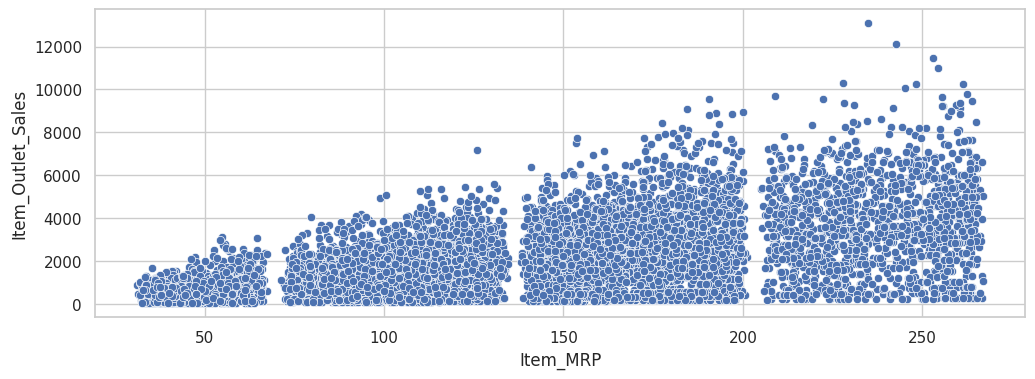

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_MRP", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

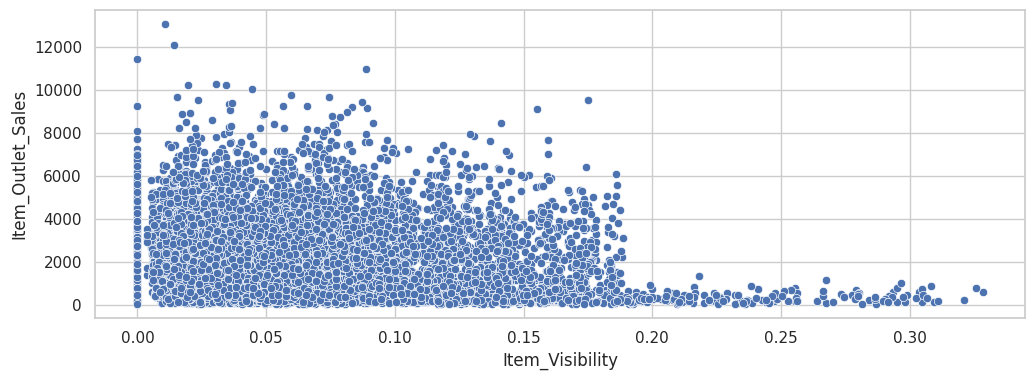

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Visibility", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

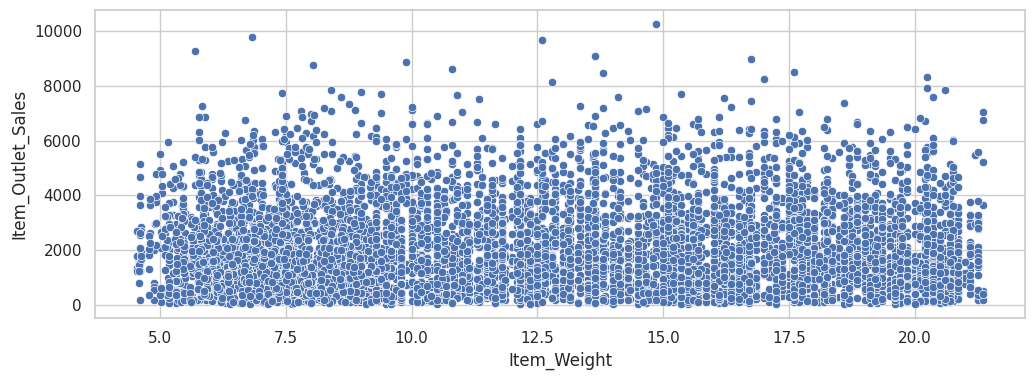

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Weight", y ="Item_Outlet_Sales",data = train)

In [22]:
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())

## Data Processsing and Feature Engineering

In [23]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
train['Item_Visibility'] =  np.where(train['Item_Visibility'] == 0,"NaN",train['Item_Visibility']).astype(float)
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
train['running'] = 2013 - train['Outlet_Establishment_Year']
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT010',"Small",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT017',"Medium",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT045',"Medium",train['Outlet_Size'])
train['Item_MRP2'] =  np.where(train['Item_MRP'] <69,"A",
                              np.where(train['Item_MRP'] <136,"B",
                                       np.where(train['Item_MRP'] <203,"C","D")))
#train['Item_Visibility2'] =  np.where(train['Item_Visibility'] < 0.19,1,0)



test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Visibility'] =  np.where(test['Item_Visibility'] == 0,"NaN",test['Item_Visibility']).astype(float)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)
test['running'] = 2013 - test['Outlet_Establishment_Year']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT010',"Small",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT017',"Medium",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT045',"Medium",test['Outlet_Size'])
test['Item_MRP2'] =  np.where(test['Item_MRP'] <69,"A",
                              np.where(test['Item_MRP'] <136,"B",
                                       np.where(test['Item_MRP'] <203,"C","D")))
#test['Item_Visibility2'] =  np.where(test['Item_Visibility'] < 0.19,1,0)

<Axes: >

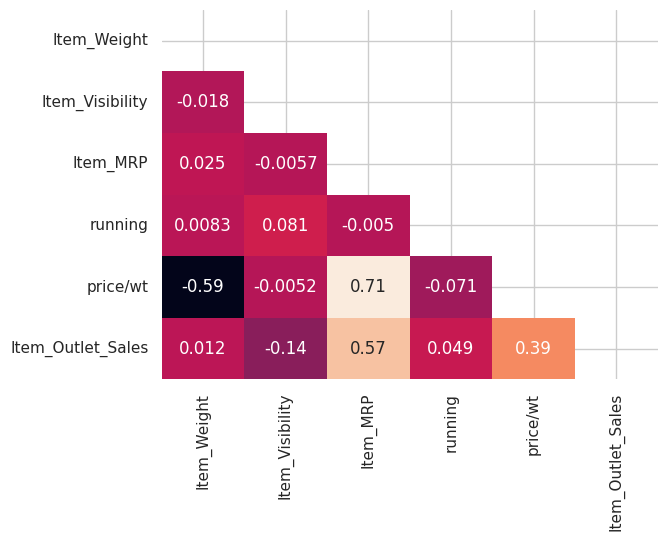

In [24]:
# Check co-relation with target for numeric columns
import seaborn as sns
import numpy as np
corr=train[['Item_Weight','Item_Visibility','Item_MRP','running','price/wt','Item_Outlet_Sales']].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask,cbar=False)

In [25]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1)

In [26]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,running,price/wt,Item_MRP2
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,14,26.861204,D
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,4,8.153581,A
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,14,8.092457,C
3,FD,19.20,1,NaN,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,15,9.484115,C
4,NC,8.93,0,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,26,6.031512,A


In [40]:
 x_train = x_train.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()))
 test = test.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('NA'))

In [41]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(test)

ValueError: could not convert string to float: 'FD'

In [42]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

In [43]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
# Train the model
#model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

In [50]:
# Evaluate the model
#mse = model.evaluate(X_test_scaled, y_test, verbose=0)
#print("Mean Squared Error on test set:", mse)

In [57]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

def objective(trial,data=x_train,target=y_train):

    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        #'task_type': 'GPU',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param,cat_features=categorical_features)

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)

    return rmse

In [58]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [59]:
# checking the version of keras
from tensorflow import keras

In [ ]:
# import optuna
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=5)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [55]:
Best_trial = {'l2_leaf_reg': 0.001061926310,'max_bin': 322,
 'learning_rate': 0.01081467174,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 163,
              'loss_function': 'RMSE','n_estimators':  1000}

In [53]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [60]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostRegressor(**Best_trial,cat_features=categorical_features)
model.fit(x_train, y_train)
test_pred = model.predict(test[x_train.columns])

0:	learn: 1696.5184236	total: 12.8ms	remaining: 12.8s
1:	learn: 1686.3506974	total: 21.7ms	remaining: 10.8s
2:	learn: 1675.8159590	total: 30.7ms	remaining: 10.2s
3:	learn: 1666.1200752	total: 39.1ms	remaining: 9.73s
4:	learn: 1656.1390304	total: 48.9ms	remaining: 9.74s
5:	learn: 1646.1853280	total: 59ms	remaining: 9.78s
6:	learn: 1636.5468913	total: 67.3ms	remaining: 9.55s
7:	learn: 1626.8701162	total: 75.1ms	remaining: 9.31s
8:	learn: 1617.4910508	total: 85ms	remaining: 9.36s
9:	learn: 1608.1377884	total: 97.4ms	remaining: 9.64s
10:	learn: 1598.9391184	total: 108ms	remaining: 9.67s
11:	learn: 1589.8412201	total: 119ms	remaining: 9.8s
12:	learn: 1580.9399117	total: 131ms	remaining: 9.98s
13:	learn: 1572.3051193	total: 140ms	remaining: 9.89s
14:	learn: 1563.7949075	total: 148ms	remaining: 9.72s
15:	learn: 1555.3858435	total: 157ms	remaining: 9.67s
16:	learn: 1546.9227814	total: 165ms	remaining: 9.57s
17:	learn: 1538.7294593	total: 175ms	remaining: 9.55s
18:	learn: 1530.6940051	total: 18

KeyError: "['running', 'price/wt', 'Item_MRP2'] not in index"

In [61]:
test_pred[test_pred<33]=33
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('bigmart.csv',index=False)
ss.head()

NameError: name 'test_pred' is not defined

In [ ]:
#_Sales'],ascending=False).head(20)